# Modelleringsprosjekt - Temperatur på jordkloden

*Maja Melby*

*Rapport 28.3.2021*

## 1. Hensikt

Hensikten med dette prosjektet er å lage enkle modeller som fremstiller temperaturen på jordkloden.

## 2. Teori

Alle modellene i oppgavene er forenklet og stemmer ikke nøyaktig, men alle sier noe om hvordan temperaturen eller varmestrålingen faktisk er. Klimamodellering kan være nyttig for å si noe om hvordan temperaturen på jorda er og endrer seg.

### Oppgave 1

I oppgave 1 skal vi regne ut den gjennomsnittlige varmestrålingen som treffer på jordklodens atmosfære og velger derfor å bruke formelen:

$$S = \frac{radius_{sol}^{2}} {distanse_{sol og planet}^{2}} · varmestråling_{sol}$$

Her er $S$ den gjennomsnittlige strålingen som treffer planeten målt i $\frac{W} {m^2}$.

For å finne varmestrålingen fra sola bruker vi Stefan-Boltzmanns lov:

$$S = σT^4$$

I denne formelen er $S$ strålingen fra et legeme, her solen, målt i $\frac{W} {m^2}$ og vil i denne sammenhengen bli det samme som $varmestråling_{sol}$ i den første formelen. $σ$ er Stefan-Boltzmanns konstant, $5,6703*10^{-8} \frac{W} {m^2K^4}$, og $T$ er temperaturen til sola målt i K.

### Oppgave 2

I oppgave 2 skal vi finne den gjennomsnittlige temperaturen på jorda ved hjelp av energiprinsippet og Stefan-Boltzmanns lov. Vi omgjør da Stefan-Boltzmanns lov fra:

$$S = σT^4$$

og endrer på formelen slik at vi tar hensyn til varmestrålingen som ikke tas opp av jorda, og får formelen:

$$T = (\frac{S(1 - albedo)} {4σ})^{1/4}$$

Her er $albedo$ andelen av strålingen som reflekteres av jorda, og temperaturen er målt i kelvin. For å gjøre om temperaturen til celsius må vi subtrahere $273,15$.

### Oppgave 3

I oppgave 3 skal vi legge til en forenklet modell av atmosfæren når vi regner ut temperaturen. Ved å bruke de to systemene, der system 1 er strålingen inn i systemet fra solen og strålingen ut av atmosfæren fra jorden, og system 2 strålingen fra solen som treffer jorda, strålingen ut fra jorden og strålingen som deretter reflekteres av atmosfæren ned på jorden igjen, kommer vi fram til liknningssystemet:

$$S_{atmosfæren} = S · (1 - albedo)$$

$$S_{jorden} = S · (1 - albedo) + S_{atmosfæren}$$

Her er $S$ solkonstanten, $1361 \frac{W} {m^{2}}$. Så kan vi sette likning 1 inn i likning 2, og siden strålingen inn er lik strålingen ut vil strålingen ut av jorda være den samme som strålingen inn i jorda og vi kan bruke $S_{jorden}$ som $S$ i Stefan-Boltzmanns lov og deretter regne oss frem til temperaturen.

### Oppgave 5

I oppgave 5 skal vi prøve oss frem og prøve å forbedre modellen siden det er en rekke ting som ikke er regnet med i modellen, som for eksempel at atmosfæren ikke tar opp all strålingen jorden sender ut og at atmosfæren reflekterer noe av strålingen fra solen. Siden det ikke bare er jorden som reflektere stråling, men atmosfæren også, og de til sammen reflekterer omtrent $30$% av strålingen fra solen har jeg prøvd å forbedre modellen på det området.

### Oppgave 6

I oppgave 6 skal vi forsøke å modellere temperaturen til et punkt på jordkloden gjennom et helt år. Vi velger å bruke et punkt ved ekvator, og siden strålingen fra solen treffer omtrent vertikalt på punktet trenger vi ikke å regne på hvordan vinkelen haddde påvirket strålingen i forhold til arealet den treffer. Vi finner avstanden mellom solen og jorden den 1. i hver måned og bruker disse verdiene til å regne ut temperaturen, som vi lagrer i lister og plotter som en graf.

## 3. Resultater

### Oppgave 1

In [148]:
import math

r_s = 6.9634E8                   # Solens radius                        Enhet: m
ds_sj = 1.5E11                   # Distansen mellom solen og jorden     Enhet: m
r_j = 6.371E6                    # Jordens radius                       Enhet: m
SB = 5.6703E-8                   # Stefan-Boltzmanns konstant           Enhet: W/m^2K^4
T = 5778                         # Solens temperatur                    Enhet: K

vs_s = SB * T**4                 # Varmestråling fra solen              Enhet: W/m^2

S = r_s**2 / ds_sj**2 * vs_s     # Stråling som treffer jorda           Enhet: W/m^2

print("Den gjennomsnittlige varmestrålingen som treffer vertikalt på jordens atmosfære er", round(S,3), "W/m^2")

Den gjennomsnittlige varmestrålingen som treffer vertikalt på jordens atmosfære er 1361.998 W/m^2


### Oppgave 2

In [172]:
import math

S = 1361                                              # Solkonstanten                                    Enhet: W/m^2
albedo = 0.3                                          # Andel av strålingen på jorda som reflekteres
SB = 5.6703E-8                                        # Stefan-Boltzmanns konstant                       Enhet: W/m^2K^4

T = (S * (1 - albedo) / (4 * SB))**(1/4)              # Temperaturen på jorden                           Enhet: K
T -= 273.15                                                                                            # Enhet: ºC

print("Gjennomsnittstemperaturen på jorda er", round(T,2), "ºC.")

Gjennomsnittstemperaturen på jorda er -18.57 ºC.


### Oppgave 3

In [184]:
import math

SB = 5.6703E-8                   # Stefan-Boltzmanns konstant                           Enhet: W/m^2K^4
S = 1361                         # Solkonstanten                                        Enhet: W/m^2
r_j = 6.371E6                    # Jordens radius                                       Enhet: m
albedo = 0.3                     # Andel av strålingen på jorda som reflekteres


S_a = S * (1 - albedo)           # Likning I      Strålingen sendt ut av atmosfæren     Enhet: W/m^2
S_j = S * (1 - albedo) + S_a     # Likning II     Strålingen sendt ut av jorden         Enhet: W/m^2

T = (S_j / (4 * SB))**(1/4)      # Temperaturen på jorden                               Enhet: K
T -= 273.15                                                                           # Enhet: ºC

print("Gjennomsnittstemperaturen er", round(T, 2), "ºC.")

Gjennomsnittstemperaturen er 29.6 ºC.


### Oppgave 5

In [185]:
import math

albedo_a = x                              # Andel av strålingen fra sola på atmosfæren som reflekteres
albedo_j = (0.3 - aldebo_a) / (1 + x)     # Andel av strålingen på jorda som reflekteres
SB = 5.6703E-8                            # Stefan-Boltzmanns konstant                     Enhet: W/m^2K^4
S = 1361                                  # Solkonstanten                                  Enhet: W/m^2
S0 = S * (1 - albedo_a)                   # Strålingen fra sola som ikke reflekteres av atmosfæren
r_j = 6.371E6                             # Jordens radius                                 Enhet: m


S_a = S0 * (1 - albedo_j)                 # Likning I      Stråling sendt ut av solen      Enhet: W/m^2
S_j = S0 * (1 - albedo_j) + S_a           # Likning II     Stråling sendt ut av jorden     Enhet: W/m^2

T = (S_j / (4 * SB))**(1/4)               # Temperaturen på jorden                         Enhet: K
T -= 273.15                                                                              # Enhet: ºC

print("Gjennomsnittstemperaturen er", round(T, 2), "ºC.")

NameError: name 'x' is not defined

### Oppgave 6

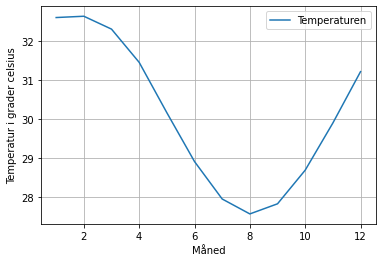

In [152]:
import math
import pylab

temperatur = []
tid = []

SB = 5.6703E-8            # Stefan-Boltzmanns konstant                       Enhet: W/m^2K^4
r_j = 6.371E6             # Jordens radius                                   Enhet: m
r_s = 6.9634E8            # Solens radius                                    Enhet: m
albedo = 0.3              # Andel av strålingen på jorda som reflekteres
T = 5778                  # Solens temperatur                                Enhet: K
vs_s = SB * T**4          # varmestråling fra solen                          Enhet: W/m^2

ds_sj = [147.126E9, 147.094E9, 147.412E9, 148.238E9, 149.502E9, 150.744E9, 151.707E9, 152.093E9, 151.831E9, 150.965E9, 149.763E9, 148.470E9]     # distansen mellom solen og jorden     Enhet: m

for i in range(12):
    S = r_s**2 / ds_sj[i]**2 * vs_s     # Strålingen fra solen               Enhet: W/m^2
    S_j = 2 * S * (1 - albedo)          # Strålingen punktet på jorden sender ut og som er lik som den som treffer punktet dersom energi_inn = energi_ut     Enhet: W/m^2
    T = (S_j / (4 * SB))**(1/4)         # Temperaturen på punktet            Enhet: K
    T -= 273.15                                                            # Enhet: grader celsius
    
    temperatur.append(T)
    tid.append(i+1)

pylab.plot(tid,temperatur, label='Temperaturen')
pylab.legend()
pylab.xlabel('Måned')
pylab.ylabel('Temperatur i grader celsius')
pylab.grid()
pylab.show()

## 4. Diskusjon

### Oppgave 1

Formelen forteller at den gjennomsnittlige varmestårlingen som treffer vertikalt på jordens atmosfære er omtrent $1361,998 \frac{W} {m^2}$.

Denne formelen fungerer fordi man starter med området strålingen fra solen er, hvor $arealet = 4πradius_{solen}^2$, og dividerer det på området strålingen er fordelt ut over når den har bevegd seg til jorden, hvor $arealet = 4πdistanse_{solen og jorden}^2$, og så multipliserer brøken med den strålingen sola sender ut per $m^2$, $varmestråling_{sol} = σT^{4}$. Da ender vi opp med formelen $S = \frac{4πradius_{solen}^2} {4πdistanse_{solen og jorden}^2} · varmestråling_{sol}$, og når vi forkorter brøken får vi formelen vi brukte, $S = \frac{radius_{solen}^2} {distanse_{solenogjorden}^2} · varmesråling_{sol}$.

Formelen forutsetter at all varmestrålingen fra sola som havner på området der jordas atmosfære er faktisk kommer seg til jordens atmosfære og at det ikke kommer varmestråling fra andre legemer enn solen til jordens atmosfære.


### Oppgave 2

Ved å bruke energiprinsippet og Stefan-Boltzmanns lov får vi at den gjennomsnittlige temperaturen på jorden er omtrent $-18,57$ºC.

Denne modellen forutsetter at den eneste strålingen som treffer jorden kommer rett fra solen, og at det ikke er noen drivhuseffekt eller atmosfære som reflekterer stråling, og svaret er derfor annerledes enn den målte gjennomsnittstemperaturen på jorda på $+15$ºC.

I denne modellen kan vi anta at planeten er en flat sirkel fordi strålingen fra solen ikke brer seg rundt jorden, men treffer en flate av den. Den vil treffe denne flaten, som vil være det samme som en sirkel i jorden gjennom jordens midtpunkt, vertikalt, og ved å anta at planeten er en flat sirkel gjør vi det enklere for oss selv siden vi slipper å regne ut strålingne per kvadratmeter der den ikke havner vertikalt på jorden. I tillegg dividerer vi $S(1 - albedo)$ med $4σ$ siden vi multipliserer strålingen som treffer jorden med overflaten av sirkelen dividert med overflatearealet av jorden, og der tar hensyn til at det også er deler av jorden som ikke treffes av strålingen fra solen, selv om det er en veldig forenklet model.

### Oppgave 3

Ved å bruke et likningssystem viser denne modellen med en forenklet atmosfære oss at gjennomsnittstemperaturen på jorden er omtrent $+29,6$ºC.

Dette svaret er også veldig annerledes enn den målte gjennomsnitttemperaturen på $+15$ºC, og det har nok en del å gjøre med at jorden roterer og at vi har dagsykluser, og at dette påvirker temperaturen en del. En ting til som bidrar til unøyaktigheten i resultatet er at modellen forutsetter at strålingen fra solen står vertikalt på en stor flate av jorden, noe den ikke gjør. Modellen forutsetter også at all strålingen fra solen treffer jordoverflaten og at ikke noe av strålingen reflekteres tilbake til universet av atmosfæren.

### Oppgave 5

I oppgave 5 forsøker vi å forbedre modellen for atmosfæren ved å legge til en variabel som sier noe om hvor mye av strålingen fra sola som reflekteres av atmosfæren, men siden vi ikke vet hva den andelen er lar vi den stå som $x$. Vi vet derimot at andelen av strålingen fra solen som reflekteres av både atmosfæren og jorden til sammer er omtrent $30$%, og får derfor satt opp uttrykket $albedo_{jorden} = \frac{0,3 - albedo_{atmosfæren}} {1 + x}$.

Modellen ser fortsatt bort ifra blant annet jordens rotasjon og dagsyklus, og at strålingen ikke treffer noe annet før den kommer til atmosfæren eller at det kommer stråling fra andre kilder enn solen.

### Oppgave 6

I oppgave 6 fikk vi en graf som viser at gjennomsnittstemperaturen i det på det valgte punktet er høyere om vinteren enn om sommeren, og at den er høyest i februar på litt over $+32,5$ºC og lavest i august på litt over $+27,5$ºC.

Vi velger et sted ved ekvator fordi strålingen fra solen da omtrent står vertikalt på det valgte punktet og vi slipper å regne oss frem til en annen mengde stråling som treffer jorden per kvadratmeter enn det vi har brukt tidligere. Deretter finner vi avstanden mellom solen og jorden 1. dag i hver måned og bruker disse verdiene for å fremstille en omtrentlig graf for hvordan gjennomsnittstemperaturen er på stedet.

Modellen forutsetter at all strålingen fra solen treffer jorden og at ikke noe blir reflektert av atmosfæren, og jordens rotasjon og dagsyklus bidrar også her til unøyaktighet.

## 5. Konklusjon

Vi har modellert ulike modeller med ulik nøyaktighet for temperaturen og strålingen på jorden ved hjelp av to ulike formler og en rekke forenklinger. Modellene er sammenliknet med målte verdier.